In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [6]:
# Create a DataFrame called `tsla_hist_df` using the tesla_historical.csv file:
tsla_df = pd.read_csv(
    Path('tsla_historical.csv'),
    index_col='date',
    parse_dates=True,
    infer_datetime_format=True
)

# View the `tsla_hist_df` DataFrame:
display(tsla_df.head())
display(tsla_df.tail())

,close
date,
2010-06-29,23.89
2010-06-30,23.83
2010-07-01,21.96
2010-07-02,19.20
2010-07-06,16.11


,close
date,
2019-05-09,241.98
2019-05-10,239.52
2019-05-13,227.01
2019-05-14,232.31
2019-05-15,231.95


In [7]:
# USING ROLLING METRICS
# So far, we've focused on static risk-management metrics - those that measure data from the start date to the end date of a dataset.
# While this information is valuable, it doesn't capture the fluctuations in the risk metrics over the time period.
# For example, say that you evaluate a company's stock over a three year period and find that the beta for that period is 1.35.
# Midway through the period, the copmany made a major acquisition that drastically reduced its risk profile to a beta of 1.10.
# A static risk metric can't capture this information - and that's where rolling metrics come in.
# ROLLING METRICS capture fluctuations in data by evaluating that data over shifting, or rolling, window.
# For example, a seven-day rolling mean for 909 days of stock closing prices calculates the mean of the closing prices for the following:
    # 1. Days 1 to 7
    # 2. Days 2 to 8
    # 3. Days 3 to 9
    # And continues onward until it reaches the 90 day window.
# This gives an analyst insight into how the seven-day mean for that stock changed over the 90-day period.
# If the change in the seven-day rolling mean is significant, the analyst might need to do further research on the stock.
# This is especially true if the seven-day rolling mean for similar stocks and the rest of the market don't exhibit the same behavior.
# We can calculate rolling metrics for datasets that range from closing prices and return values to standard deviations and betas.
# We can measure rolling metrics in days, weeks, months or years.
# To better illustrate the relationship between rolling metrics and time, we can plot the results of rolling calculations.

In [8]:
# CONNECT THE DOTS:
# Analysts commonly use the beta for rolling calculations, because it yields the historical volatility of a stock relative to the market.
# This is an important behavior to understand when deciding whether to include a particular stock in a diversified portfolio.

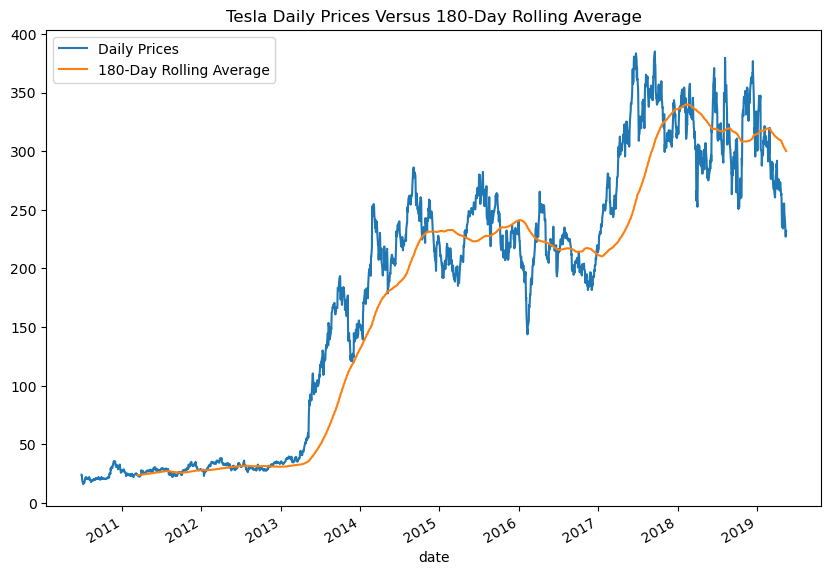

In [13]:
# CALCULATE AND PLOT ROLLING METRICS
# We visualize rolling metrics using line plots to illustrate the change in a value over a period of time.
# To calculate a rolling metric in Pandas, we use the `rolling` function, which contains the `window` parameter.
# This parameter specifies the number of data points to use to calculate the metric.
# For example, the syntax for plotting a rolling 180-day mean on a series of daily prices is as follows:
    # stock_price_df.rolling(window=180).mean().plot()
# Using a the `tsla_hist_df`, let's plot the rolling mean for each day.
# We'll use the previous 180 days of lcosing prices to do this calculation:

# Set the plot of Tesla's daily prices as the main plot in the overlay:
ax = tsla_df.plot(
    figsize=(10,7),
    title='Tesla Daily Prices Versus 180-Day Rolling Average'
)

# Plot the 180-day rolling metric as an overlay on the plot
tsla_df.rolling(window=180).mean().plot(ax=ax)

# Create the legend for the figure:
ax.legend(['Daily Prices', '180-Day Rolling Average'])

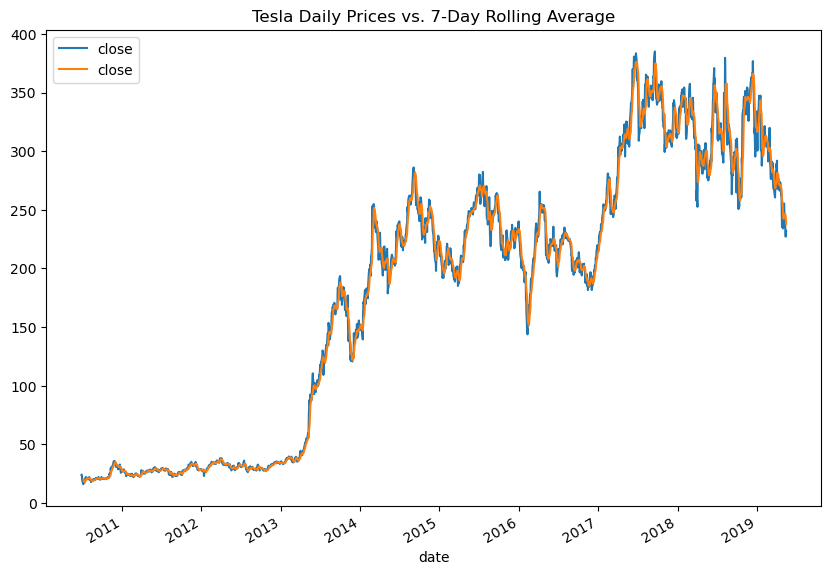

In [17]:
# This plot highlights the benefits of rolling means.
# Specifically, they tend to smooth out the price trend of the underlying data by reducing the volatility that we observe in the daily price movement.
# We can then do a more holistic analysis of a dataset rather than focusing on every twist and turn of the data.
# Overlaying a rolling statistical trend with the original data trend makes this feature easier to spot.

# NOTE:
# Because we're examining only one stock in this analysis, we're not converting the closing price information to daily returns.
# When we compare more than one stock, we use the daily return values.
# The reason is that they remove any issues that wildly different prices might create, especially in regards to plotting.

# In this example, examining a rolling 180-day window makes sense if you want to invest for the long term.
# However, a rolling 7-day window might be more logical if you want to consider a short-term, weekly horizon.
# Let's examine the plot of a seven day rolling mean vs the movement of the daily stock price:

# Set the plot of Tesla's daily prices as the main plot in the overlay:
ax = tsla_df.plot(
    figsize=(10, 7),
    title='Tesla Daily Prices vs. 7-Day Rolling Average'
)

# Plot the 7-day rolling metric as an overlay on the plot:
tsla_df.rolling(window=7).mean().plot(ax=ax)

# Create the legend for the figure:
ax7.legend(['Daily Prices', '7-Day Rolling Average'])

In [18]:
# 7-DAY ROLLING WINDOW SUMMARY:
# Based on this plot, we can compare the daily price movement to the seven-day rolling mean.
# We can hardly notice a difference between the two.
# Examining a 7-day metric alone doesn't do as much to eliminate daily volatility as examining the longer, 180-day rolling mean.
# In fact, we can compare the rolling metrics for values across different time periods such as:
    # 1. Prices
    # 2. Daily Returns
    # 3. Standard Deviations
    # 4. Variances
    # 5. Covariances
# Building an analysis based on these metrics supply an abundance of risk managment information.

In [19]:
# ON THE JOB:
# If you find yourself working as an analyst for a FinTech investor, "rolling mean" will have another name:
# A term commonly associated with rolling mean is the Simple Moving Average, or SMA.

<AxesSubplot:title={'center':'Tesla Daily Prices - 30-Day Rolling Standard Deviation'}, xlabel='date'>

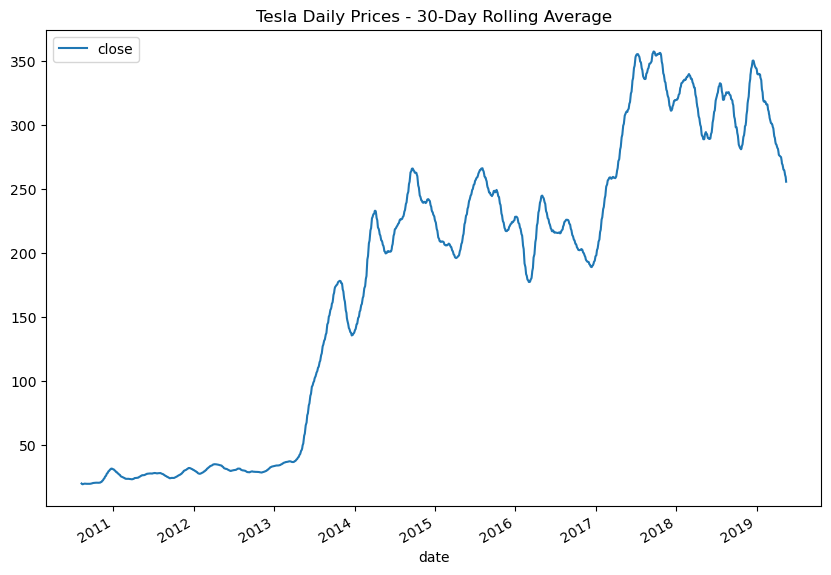

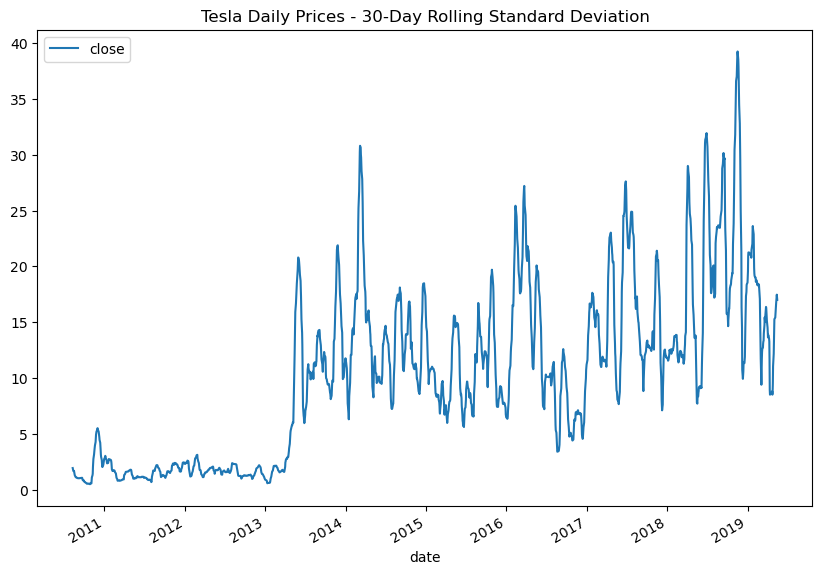

In [21]:
# COMPARE ROLLING METRICS ACROSS TIME PERIODS
# Plotting different rolling metrics (for examplt, 30-day vs 180-day) for the same asset can reveal further insights for managing risk.
# Let's revist the Tesla stock as an example and plot the 30-day rolling mean and standard deviation:

# Plot a rolling 30-day mean of TSLA's closing prices:
tsla_df.rolling(window=30).mean().plot(
    figsize=(10,7),
    title='Tesla Daily Prices - 30-Day Rolling Average',
)

# Plot a rolling 30-day standard deviation of TSLA's closing prices:
tsla_df.rolling(window=30).std().plot(
    figsize=(10,7),
    title='Tesla Daily Prices - 30-Day Rolling Standard Deviation'
)

<AxesSubplot:title={'center':'Tesla Daily Prices - 180-Day Rolling Standard Deviation'}, xlabel='date'>

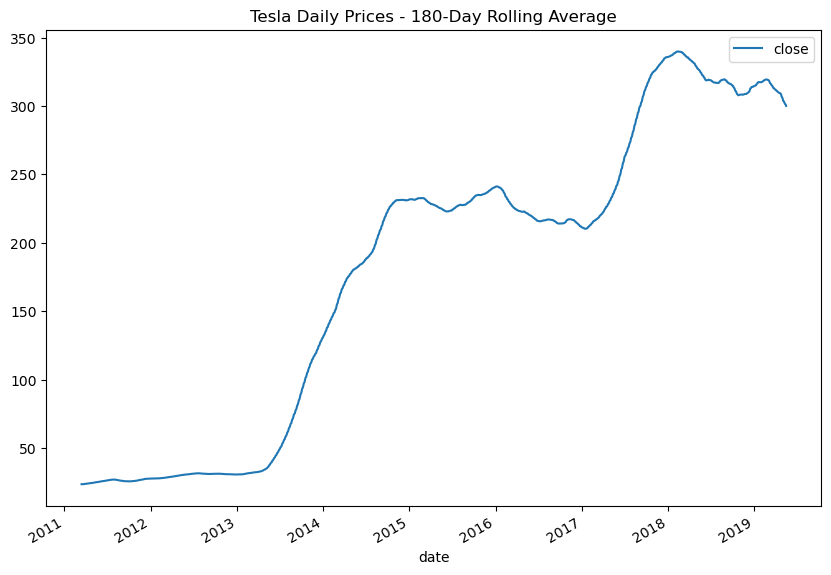

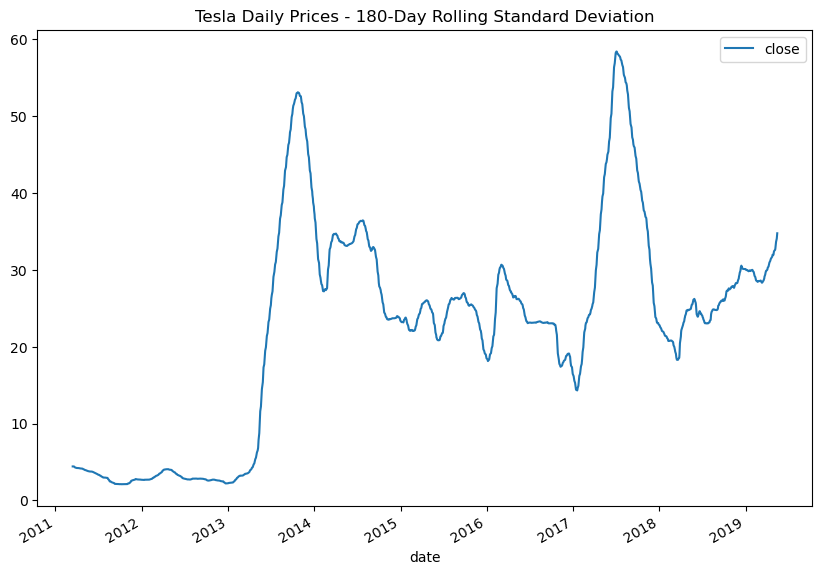

In [22]:
# Now, let's compare these to the 180-day rolling mean and standard deviation:

# Plot the rolling 180-day mean of TSLA's closing prices:
tsla_df.rolling(window=180).mean().plot(
    figsize=(10,7),
    title='Tesla Daily Prices - 180-Day Rolling Average'
)

# Plot the rolling 180-day standard deviation of TSLA's closing prices:
tsla_df.rolling(window=180).std().plot(
    figsize=(10,7),
    title='Tesla Daily Prices - 180-Day Rolling Standard Deviation'
)

In [23]:
# the first thing to note is that the 30-day rolling std is significantly more volatile than the 180-day std.
# Proof that longer observation periods tend to smooth out the volatility of rolling metrics.
# As the data smooths out, drastic changes in the data become more apparent. 
# Essentially, rolling metrics help show the progression of a particular metric over time. 

In [27]:
# USING THE ROLLING BETA
# As reviewed before, the beta measures how one stock moves in response to the movements of a broader market or index, such as the S&P 500.
# You can calculate the beta for any asset. 
# The finance industry has standard benchmarks for the international equity market, the bond market, emerging markets, and other markets.
# Once you identify the best benchmark to associate with your asset, determining the beta is only a few calculations away.
# Understanding how an asset will likely behave relative to the benchmark in different market conditions helps quantitative analysts build diverse portfolios.
# Seleting assets when you know the expected behavior over time vs. the benchmark will help you mitigate a portfolio's risk.
# Therefore, calculating the ROLLING BETA, or the beta over time, is invaluable.

# Create the `amzn_spx_df` DataFrame and review the results:
amzn_spx_df = pd.read_csv(
    Path('amzn_sp500_data.csv'),
    index_col='date',
    parse_dates=True,
    infer_datetime_format=True
)

# Display the first and last 5 rows of the `amzn_spx_df`:
display(amzn_spx_df.head())
display(amzn_spx_df.tail())

,AMZN,S&P 500
date,,
2014-05-20,301.19,1872.829956
2014-05-21,305.01,1888.030029
2014-05-22,304.91,1892.489990
2014-05-23,312.24,1900.530029
2014-05-27,310.82,1911.910034


,AMZN,S&P 500
date,,
2019-05-13,1822.68,2811.870117
2019-05-14,1840.12,2834.409912
2019-05-15,1871.15,2850.959961
2019-05-16,1907.57,2876.320068
2019-05-17,1869.00,2859.530029


In [29]:
# CALCULATE THE ROLLING BETA
# Calculating the rolling beta for an asset requires a few steps:
    # 1. Use the `pct_change()` and `dropna()` functions to generate a `daily_returns` DataFrame for the asset and the market.
    # 2. Use the `rolling()` and `var()` functions to calculate the 30-day rolling variance of the market's daily returns, then plot the result.
    # 3. Use the `rolling()` and `cov()` functions to calcualte the 30-day rolling covariance between the stock's and the market's daily returns and plot the result.
    # 4. to calculate the rolling beta, divide the asset's 30-day rolling covariance by the market's 30-day variance, then plot the result.

In [30]:
# STEP 1: CREATE A DAILY RETURNS DATAFRAME

# Create and review the `daily_returns` DataFrame:
amzn_daily_returns = amzn_spx_df.pct_change().dropna()

# Review the results
display(amzn_daily_returns.head())
display(amzn_daily_returns.tail())

,AMZN,S&P 500
date,,
2014-05-21,0.012683,0.008116
2014-05-22,-0.000328,0.002362
2014-05-23,0.024040,0.004248
2014-05-27,-0.004548,0.005988
2014-05-28,-0.002123,-0.001114


,AMZN,S&P 500
date,,
2019-05-13,-0.035609,-0.024131
2019-05-14,0.009568,0.008016
2019-05-15,0.016863,0.005839
2019-05-16,0.019464,0.008895
2019-05-17,-0.020219,-0.005837


<AxesSubplot:title={'center':'S&P 500 - Rolling 30 Day Variance'}, xlabel='date'>

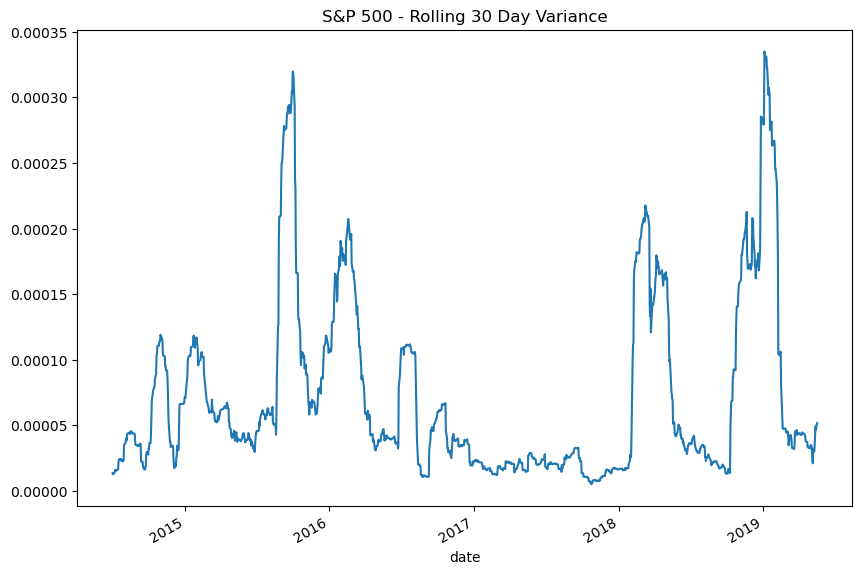

In [34]:
# STEP 2: CALCUALTE A 30-DAY S&P 500 (MARKET) ROLLING VARIANCE 
market_rolling_30_variance = amzn_daily_returns['S&P 500'].rolling(window=30).var()

# Create the plot for the S&P 500 30-day rolling variance:
market_rolling_30_variance.plot(
    figsize=(10, 7),
    title='S&P 500 - Rolling 30 Day Variance'
)

# As you can see, the market it volatile, but the variance is concentrated between 0.00005 and 0.00035.

<AxesSubplot:title={'center':'AMZN vs. S&P 500 - Rolling 30 Day Covariance'}, xlabel='date'>

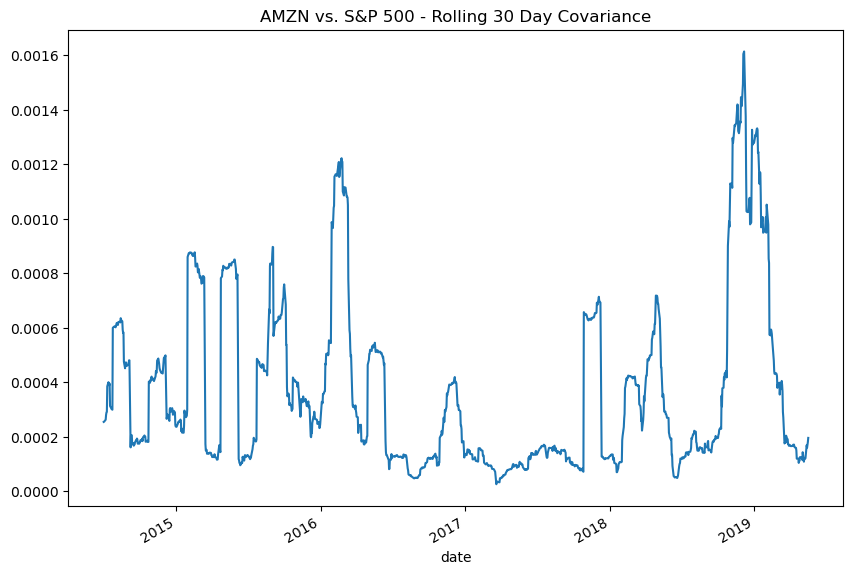

In [35]:
# STEP 3: CALCULATE THE 30-DAY ROLLING COVARIANCE
amzn_rolling_30_covariance = amzn_daily_returns['AMZN'].rolling(window=30).cov()

# Create the plot for AMZN's 30-day rolling covariance: 
amzn_rolling_30_covariance.plot(
    figsize=(10,7),
    title='AMZN vs. S&P 500 - Rolling 30 Day Covariance'
)

<AxesSubplot:title={'center':'AMZN - Rolling 30-Day Beta'}, xlabel='date'>

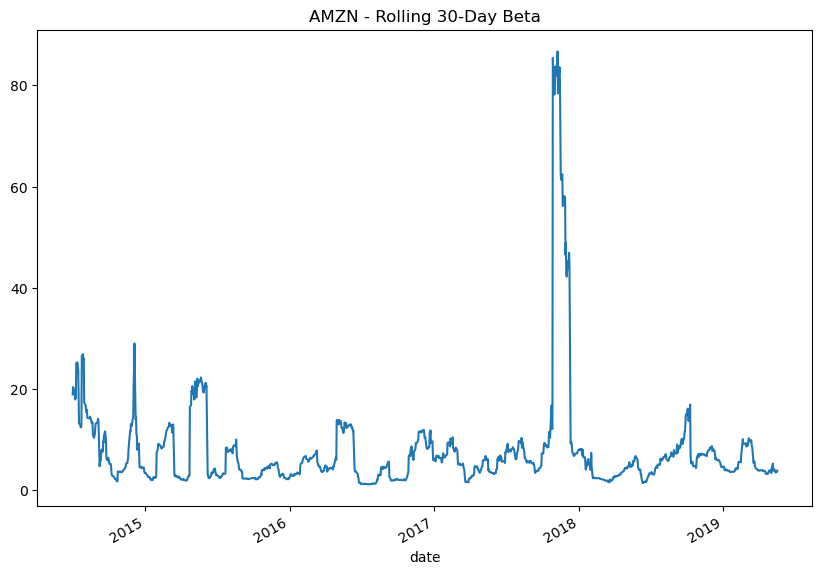

In [36]:
# STEP 4: CALCULATE THE ROLLING BETA
# Calculate the rolling beta by dividing AMZN's 30 day rolling covariance by the S&P 500 market variance:
amzn_rolling_30_beta = amzn_rolling_30_covariance / market_rolling_30_variance

# Create the plot for AMZN's 30-day rolling beta:
amzn_rolling_30_beta.plot(
    figsize=(10,7),
    title='AMZN - Rolling 30-Day Beta'
)

In [37]:
# ROLLING BETA SUMMARY:
# We've achieved what we wanted: A measure that we can interpret of how risk is changing for Amazon.
# Based on the plot, we can say that Amazon's 30-day rolling beta lies between about 1.0 and 1.5 most of the time.
# This means that investing in Amazon on occasion is about as risky as investing in the benchmark.
# However, time exist when that risk can be much greater - anywhere from 50% greater (which is common) up to 500% greater (which is unusual).
# The plot also indicates that the beta rose above 5.0 in November 2017.
# This means that if it market moved up by 1% during that next time, Amazon jumped up as much by 5% - and vice versa when the market fell.
# Because of such out-of-proportion sensitivity to the market, adding more Amazon stock to a portfolio during this time would have only increased that portfolio's level of risk.

In [38]:
# ON THE JOB:
# Based on the plot, the 30-day rolling beta was only around 5.0 for a short period.
# But an outsized move like that could have greatly influenced the overall performance of a portfolio for the three-month quarter that included the event - or even a full year.
# When building a diversified portfolio, you would have wanted to minimize your exposure to other stocks that exhibited behavior similar to Amazon's over the same period.

In [ ]:
# RECAP:
# The beta is a measure of an asset's risk vs the market's risk. The higher the beta that stock carries, the more risk it adds to a portfolio.
# Rolling betas are invaluable, because you can observe the trends in a stock's performance relative to the market under various market conditions.
# Because companies and economic conditions change over time, the rolling beta of every asset also changes over time. It's important to understand how each asset reacts to changing conditions.
# A central goal of portfolio diversification is to build a collection of assets that demonstrate different rolling betas over various changing conditions.
# This works to minimize risk and, with the right FinTech diversification tools in place, to maximize return.